# Manuel Romero García
## Máster en Big Data y Data Science UCM
### Tarea Deep Learning

Dado que el entrenamiento de redes neuronales es una tarea  muy costosa, **se recomienda ejecutar el notebooks en [Google Colab](https://colab.research.google.com)**, por supuesto también se puede ejecutar en local.

Al entrar en [Google Colab](https://colab.research.google.com) bastará con hacer click en `upload` y subir este notebook. No olvide luego descargarlo en `File->Download .ipynb`

**El examen deberá ser entregado con las celdas ejecutadas, si alguna celda no está ejecutadas no se contará.**

El examen se divide en tres partes, con la puntuación que se indica a continuación. La puntuación máxima será 10.

- [Actividad 1: Redes Densas](#actividad_1): 4 pts
    - Correcta normalización: máximo de 0.25 pts
    - [Cuestión 1](#1.1): 1 pt
    - [Cuestión 2](#1.2): 1 pt
    - [Cuestión 3](#1.3): 0.5 pts
    - [Cuestión 4](#1.4): 0.25 pts
    - [Cuestión 5](#1.5): 0.25 pts
    - [Cuestión 6](#1.6): 0.25 pts
    - [Cuestión 7](#1.7): 0.25 pts
    - [Cuestión 8](#1.8): 0.25 pts


- [Actividad 2: Redes Convolucionales](#actividad_2): 4 pts
    - [Cuestión 1](#2.1): 1 pt
    - [Cuestión 2](#2.2): 1.5 pt
    - [Cuestión 3](#2.3): 0.5 pts
    - [Cuestión 4](#2.4): 0.25 pts
    - [Cuestión 5](#2.5): 0.25 pts
    - [Cuestión 6](#2.6): 0.25 pts
    - [Cuestión 7](#2.7): 0.25 pts
    
    
- [Actividad 3: Redes Recurrentes](#actividad_3): 2 pts
    - [Cuestión 1](#3.1): 0.5 pt
    - [Cuestión 2](#3.2): 0.5 pt
    - [Cuestión 3](#3.3): 0.5 pts
    - [Cuestión 4](#3.4): 0.25 pts
    - [Cuestión 5](#3.5): 0.25 pts



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tf.random.set_seed(0)

In [198]:
def plot_train_val(history, lim1, lim2):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(lim1, lim2)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

<a name='actividad_1'></a>
# Actividad 1: Redes Densas

Para esta primera actividad vamos a utilizar el [wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). Con el que trataremos de predecir la calidad del vino.

**Puntuación**: 

Normalizar las features correctamente (x_train, x_test): 0.25 pts , se pueden normalizar con el [Normalization layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) de Keras. Ejemplo de uso: [Introduction_to_RNN_Time_Series](https://github.com/ezponda/intro_deep_learning/blob/main/class/RNN/Introduction_to_RNN_Time_Series.ipynb)

```python
tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, dtype=None, mean=None, variance=None, **kwargs
)
```

- Correcta normalización: máximo de 0.25 pts
- [Cuestión 1](#1.1): 1 pt
- [Cuestión 2](#1.2): 1 pt
- [Cuestión 3](#1.3): 0.5 pts
- [Cuestión 4](#1.4): 0.25 pts
- [Cuestión 5](#1.5): 0.25 pts
- [Cuestión 6](#1.6): 0.25 pts
- [Cuestión 7](#1.7): 0.25 pts
- [Cuestión 8](#1.8): 0.25 pts



In [130]:
# Descargar los datos con pandas
df_red = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
df_white = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';'
)
df = pd.concat([df_red, df_white])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [131]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [132]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]


# separar features y target
y = df.pop('quality').values
X = df.copy().values

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)
print('Some qualities: ', y_train[:5])

x_train, y_train shapes: (4872, 11) (4872,)
x_test, y_test shapes: (1625, 11) (1625,)
Some qualities:  [6 7 8 5 6]


In [134]:
# Copia y pega del notebook de RNN aplicado a x_train y x_test

norm = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=-1, dtype=None, mean=None, variance=None
)

print('Normal row:', x_train[:1])

# fit al train
norm.adapt(x_train)

# aplica al train
x_train = norm(x_train)

print('Normalized row:', x_train[:1])

# aplica al test
x_test = norm(x_test)

print('Normalized df, mean row:', np.mean(x_test))
print('Normalized df, std row:', np.std(x_test))

Normal row: [[7.100e+00 2.200e-01 3.200e-01 1.690e+01 5.600e-02 4.900e+01 1.580e+02
  9.998e-01 3.370e+00 3.800e-01 9.600e+00]]
Normalized row: tf.Tensor(
[[-0.08802134 -0.72820073  0.0051775   2.485174   -0.00588979  1.0297223
   0.7446252   1.7524505   0.9511134  -1.0093288  -0.7528128 ]], shape=(1, 11), dtype=float32)
Normalized df, mean row: 0.0047403183
Normalized df, std row: 1.0037555


<a name='1.1'></a>
## Cuestión 1: Cree un modelo secuencial que contenga 4 capas ocultas(hidden layers), con más de 60 neuronas  por capa, sin regularización y obtenga los resultados.

Puntuación: 
- Obtener el modelo correcto: 0.8 pts
- Compilar el modelo: 0.1pts
- Acertar con la función de pérdida: 0.1 pts

In [176]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(120, activation='relu', input_shape=(X.shape[1],))) 
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(120, activation='relu'))

model.add(keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 120)               1440      
                                                                 
 dense_68 (Dense)            (None, 120)               14520     
                                                                 
 dense_69 (Dense)            (None, 120)               14520     
                                                                 
 dense_70 (Dense)            (None, 120)               14520     
                                                                 
 dense_71 (Dense)            (None, 1)                 121       
                                                                 
Total params: 45,121
Trainable params: 45,121
Non-trainable params: 0
_________________________________________________________________


In [177]:
#!pip install pydot
#!pip install graphviz
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)
# aunque están instalados, me sigue saliendo este mensaje, es raro

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [178]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam', loss='mean_squared_error')

In [179]:
# No modifique el código
history = model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 [==============================] - 1s 3ms/step - loss: 3.9076 - val_loss: 1.4798
Epoch 2/200
122/122 [==============================] - 0s 2ms/step - loss: 0.9216 - val_loss: 0.7790
Epoch 3/200
122/122 [==============================] - 0s 2ms/step - loss: 0.6221 - val_loss: 0.6025
Epoch 4/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5380 - val_loss: 0.6029
Epoch 5/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5058 - val_loss: 0.5291
Epoch 6/200
122/122 [==============================] - 0s 2ms/step - loss: 0.4952 - val_loss: 0.5794
Epoch 7/200
122/122 [==============================] - 0s 2ms/step - loss: 0.4696 - val_loss: 0.5443
Epoch 8/200
122/122 [==============================] - 0s 2ms/step - loss: 0.4642 - val_loss: 0.4956
Epoch 9/200
122/122 [==============================] - 0s 2ms/step - loss: 0.4499 - val_loss: 0.5954
Epoch 10/200
122/122 [==============================] - 0s 2ms/step - loss: 0.4336 - val_lo

Epoch 161/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.5261
Epoch 162/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0333 - val_loss: 0.5545
Epoch 163/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.5465
Epoch 164/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 0.5428
Epoch 165/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.5554
Epoch 166/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.5546
Epoch 167/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.5432
Epoch 168/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0267 - val_loss: 0.5434
Epoch 169/200
122/122 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.5297
Epoch 170/200
122/122 [==============================] - 0s 2ms/step - lo

In [180]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 2ms/step - loss: 0.5924
Test Loss: 0.5924307107925415


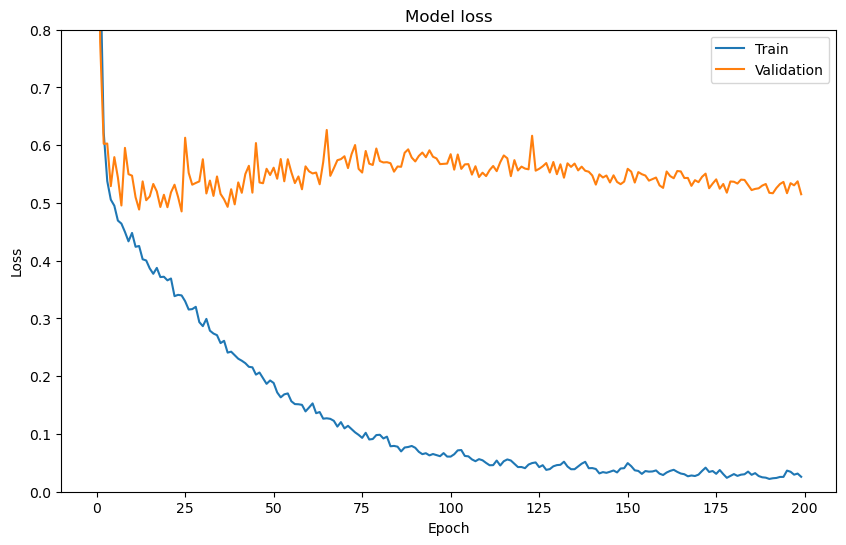

In [181]:
plot_train_val(history, 0, 0.8)

#### Como era de esperar, overfitting del copón

<a name='1.2'></a>
## Cuestión 2: Utilice el mismo modelo de la cuestión anterior pero añadiendo al menos dos técnicas distinas de regularización.

Ejemplos de regularización: [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb)

Puntuación:

- Obtener el modelo con la regularización: 0.8 pts
- Obtener un `test loss` inferior al anterior: 0.2 pts


In [161]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(120, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01))) # l2 de 0.01
model.add(keras.layers.Dropout(0.3)) # Dropout de 0.3

# También prefiero la L2 a la L1 por coherencia, ya que estamos usando el MSE que es una medida relativa y no absoluta

model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 120)               1440      
                                                                 
 dropout_4 (Dropout)         (None, 120)               0         
                                                                 
 dense_58 (Dense)            (None, 120)               14520     
                                                                 
 dense_59 (Dense)            (None, 120)               14520     
                                                                 
 dense_60 (Dense)            (None, 120)               14520     
                                                                 
 dense_61 (Dense)            (None, 1)                 121       
                                                                 
Total params: 45,121
Trainable params: 45,121
Non-tra

In [162]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam', loss='mean_squared_error')

In [167]:
batch_size=32

In [168]:
# No modifique el código
history = model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1)

Epoch 1/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5378 - val_loss: 0.5575
Epoch 2/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5451 - val_loss: 0.5470
Epoch 3/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5396 - val_loss: 0.5338
Epoch 4/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5403 - val_loss: 0.5385
Epoch 5/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5305 - val_loss: 0.5307
Epoch 6/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5464 - val_loss: 0.5377
Epoch 7/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5399 - val_loss: 0.5472
Epoch 8/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5314 - val_loss: 0.5327
Epoch 9/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5321 - val_loss: 0.5698
Epoch 10/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5302 - val_lo

Epoch 161/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5110 - val_loss: 0.5288
Epoch 162/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5212 - val_loss: 0.5282
Epoch 163/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5122 - val_loss: 0.5275
Epoch 164/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.5342
Epoch 165/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5141 - val_loss: 0.5288
Epoch 166/200
122/122 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.5228
Epoch 167/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5190 - val_loss: 0.5406
Epoch 168/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5139 - val_loss: 0.5331
Epoch 169/200
122/122 [==============================] - 0s 3ms/step - loss: 0.5193 - val_loss: 0.5304
Epoch 170/200
122/122 [==============================] - 0s 3ms/step - lo

In [169]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 2ms/step - loss: 0.5433
Test Loss: 0.5433215498924255


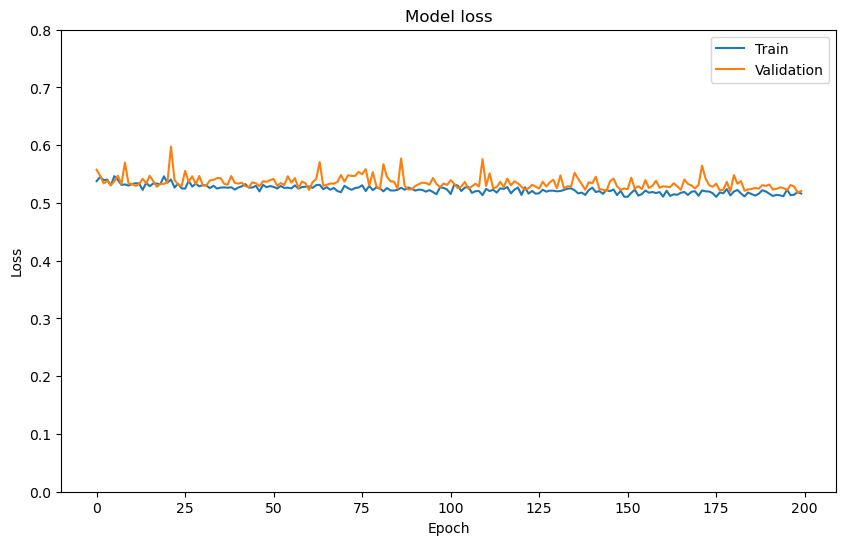

In [170]:
plot_train_val(history, 0, 0.8)

#### El modelo es ligeramente mejor, bajando 0.04 puntos del MSE

<a name='1.3'></a>
## Cuestión 3: Utilice el mismo modelo de la cuestión anterior pero añadiendo un callback de early stopping.

In [171]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(120, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01))) # l2 de 0.01
model.add(keras.layers.Dropout(0.3)) # Dropout de 0.3

model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 120)               1440      
                                                                 
 dropout_5 (Dropout)         (None, 120)               0         
                                                                 
 dense_63 (Dense)            (None, 120)               14520     
                                                                 
 dense_64 (Dense)            (None, 120)               14520     
                                                                 
 dense_65 (Dense)            (None, 120)               14520     
                                                                 
 dense_66 (Dense)            (None, 1)                 121       
                                                                 
Total params: 45,121
Trainable params: 45,121
Non-tra

In [172]:
# Compilación del modelo
# Código aquí
model.compile(optimizer='adam', loss='mean_squared_error')

In [173]:
## definir el early stopping callback
# Código aquí
callbacks = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=[callbacks]) # Código aquí

Epoch 1/200
122/122 [==============================] - 1s 4ms/step - loss: 7.7752 - val_loss: 4.6808
Epoch 2/200
122/122 [==============================] - 0s 3ms/step - loss: 3.8458 - val_loss: 3.2304
Epoch 3/200
122/122 [==============================] - 0s 3ms/step - loss: 2.8066 - val_loss: 2.4505
Epoch 4/200
122/122 [==============================] - 0s 3ms/step - loss: 2.3030 - val_loss: 2.0666
Epoch 5/200
122/122 [==============================] - 0s 3ms/step - loss: 1.9233 - val_loss: 1.7541
Epoch 6/200
122/122 [==============================] - 0s 3ms/step - loss: 1.6913 - val_loss: 1.6301
Epoch 7/200
122/122 [==============================] - 0s 3ms/step - loss: 1.4838 - val_loss: 1.5085
Epoch 8/200
122/122 [==============================] - 0s 3ms/step - loss: 1.3160 - val_loss: 1.2252
Epoch 9/200
122/122 [==============================] - 0s 3ms/step - loss: 1.1994 - val_loss: 1.1598
Epoch 10/200
122/122 [==============================] - 0s 3ms/step - loss: 1.0925 - val_lo

In [174]:
# No modifique el código
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))

51/51 [==============================] - 0s 1ms/step - loss: 0.5748
Test Loss: 0.5748453140258789


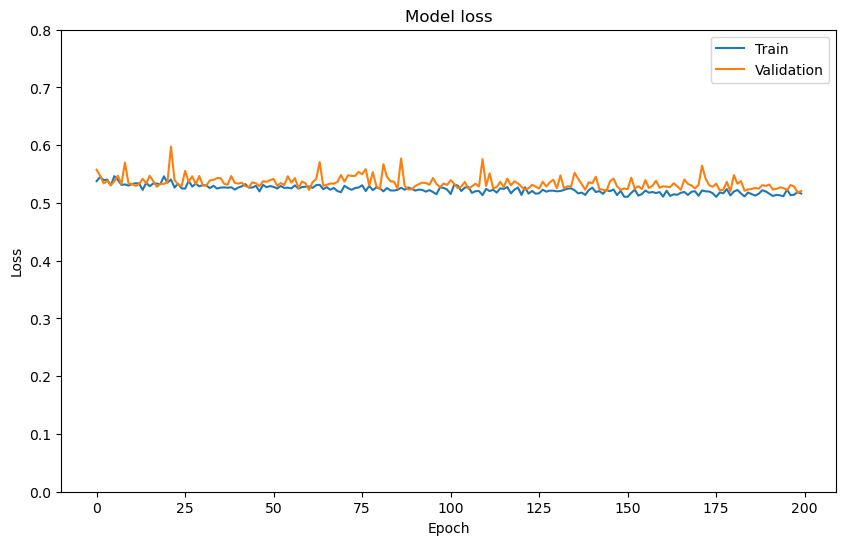

In [175]:
plot_train_val(history, 0, 0.8)

#### El resultado es ligeramente peor, pero aún así mejor que el primer model y además sólo con 51 epochs. Cabe decir que las variaciones de la validación son muy pequeñas

<a name='1.4'></a>
## Cuestión 4: ¿Podría haberse usado otra función de activación de la neurona de salida? En caso afirmativo especifíquela.

- Sí, podría haberse utilizado una relu (el resultado es similar), dado que la target es positiva, es más eficiente y es posible que escalas numéricas con pocos valores presenten no-linealidades, pero esto no es frecuente en escalas tipo likert o, como estas, de 0-10. 

- Por otra parte, al haber pocos valores, puede tomarse como un problema de clasificación, podría usarse una softmax y aún así probar el MSE (lo he hecho y el resultado es mucho peor, lo normal), pero tampoco es interesante, ya que el resultado predicho exacto (3 en vez de 2.88, p. ej.), no nos interesa. 

- Desconozco si alguien ha hecho alguna función de activación que funcione con datos ordinales sustancialmente mejor que la ReLu.

<a name='1.5'></a>
## Cuestión 5:  ¿Qué es lo que una neurona calcula?

**a)** Una función de activación seguida de una suma ponderada  de las entradas.

**b)** **Una suma ponderada  de las entradas seguida de una función de activación.**
- Una neurona suma los inputs multiplicados por un peso y ajustados por un parámetro de sesgo, para después introducirlos como argumentos de una función de activación, cuyos resultados serán las entradas de las neuronas de la siguiente capa, etc.

**c)** Una función de pérdida, definida sobre el target.

**d)** Ninguna  de las anteriores es correcta


<a name='1.6'></a>
## Cuestión 6:  ¿Cuál de estas funciones de activación no debería usarse en una capa oculta (hidden layer)?

**a)** **sigmoid**
- Por ser más ineficiente que el resto

**b)** `tanh`

**c)** `relu`

**d)** `linear`


<a name='1.7'></a>
## Cuestión 7:  ¿Cuál de estas técnicas es efectiva para combatir el overfitting en una red con varias capas ocultas? Ponga todas las que lo sean.

**a)** **Dropout**
- Es una técnica de regularización ampliamente usada en NN. Al entrenar el modelo aleatoriamente sólo con algunas neuronas, se intenta que el modelo no se ajuste perfectamente al train.

**b)** **Regularización L2**
- Su uso es similar al anterior, sólo que impone una penalización sobre las funciones de activación, moderando el fitting.


**c)** Aumentar el tamaño del test set

- No es imposible que esta técnica prevenga el overfitting bajo ciertas circunstancias, pero realmente no está relacionada con el fitting en sí. Si el tamaño del dataset es muy pequeño o bien, si la muestra que se ha escogido está sesgada, entonces es posible que mejore el overfitting, pero no es lo normal.

**d)** Aumentar el tamaño del validation set.
- Aunque esto sí influiría directamente sobre el fitting, tan sólo si el tamaño del dataset es muy pequeño y/o la muestra está sesgada, un aumento de los datos se podría suavizar el overfitting.

**e)** **Reducir el número de capas de la red**
- Reducir el número de capas haría que el fitting tuviera menos pasos, lo que naturalmente reduciría el overfitting, al pararlo antes.

**f)** **Data augmentation**
- Esta es una técnica ampliamente utilizada en Computer Vision, ya que la rotación, el cambio de dimensionalidad, de color, etc. de las imágenes puede hacer que el modelo pueda generalizar muchísimo mejor sus resultados. De hecho, es similar a un aumento del tamaño del validation set, pero bajo el supuesto de que la muestra está sesgada.

<a name='1.8'></a>
## Cuestión 8:  Supongamos que queremos entrenar una red para un problema de clasificación de imágenes con las siguientes clases: {'perro','gato','persona'}. ¿Cuántas neuronas y que función de activación debería tener la capa de salida? ¿Qué función de pérdida (loss function) debería usarse?


Asumiendo que es un problema de clasificación multiclase, la capa de salida debería tener tres neuronas para las tres clases, con una activación softmax, que es una generalización de la sigmoide para un problema con >1 grados de libertad. La función de pérdida más utilizada en este tipo de situaciones es la sparse_categorical_crossentropy, que es básicamente la generalización de la entropía para >1 grados de libertad.

Partiendo de la función softmax:
$\sigma(x)_j = \frac{e^{x_j}}{\sum_{i=1}^{K} e^{x_i}}$

Si K = 2, para j=1:

$\sigma(x)_1 = \frac{e^{x_1}}{e^{x_1} + e^{x_2}}$

Asumiendo un vector que toma los valores $[x, 0]$:

$\sigma(x)_1 = \frac{e^{x}}{e^{x} + e^{0}}$

Dividiendo por $e^{x}$

$\sigma(x) = \frac{1}{1+e^{-x}}$


Partiendo de la función de cross-entropía:

$L(y, \hat{y}) = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)$

Para el caso K=2, con un vector $[x, 0]$:

$L(y, p) = - y_0 \log((1 - p)) - y_1 \log(p)$

Lo que se puede simplificar como:

$L(y, p) = - y \log(p) - (1 - y) \log(1 - p)$

**Nota**: esto es más para aclararme yo que otra cosa

<a name='actividad_2'></a>
# Actividad 2: Redes Convolucionales

Vamos a usar el dataset [cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que son 60000 imágenes de 32x32 a color  con 10 clases diferentes. Para realizar mejor la práctica puede consultar [Introduction_to_CNN.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb).



**Puntuación**: 

- [Cuestión 1](#2.1): 1 pt
- [Cuestión 2](#2.2): 1.5 pt
- [Cuestión 3](#2.3): 0.5 pts
- [Cuestión 4](#2.4): 0.25 pts
- [Cuestión 5](#2.5): 0.25 pts
- [Cuestión 6](#2.6): 0.25 pts
- [Cuestión 7](#2.7): 0.25 pts




Puede normalizar las imágenes al principio o usar la capa [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling):

```python
tf.keras.layers.experimental.preprocessing.Rescaling(
    scale, offset=0.0, name=None, **kwargs
)
```

In [417]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

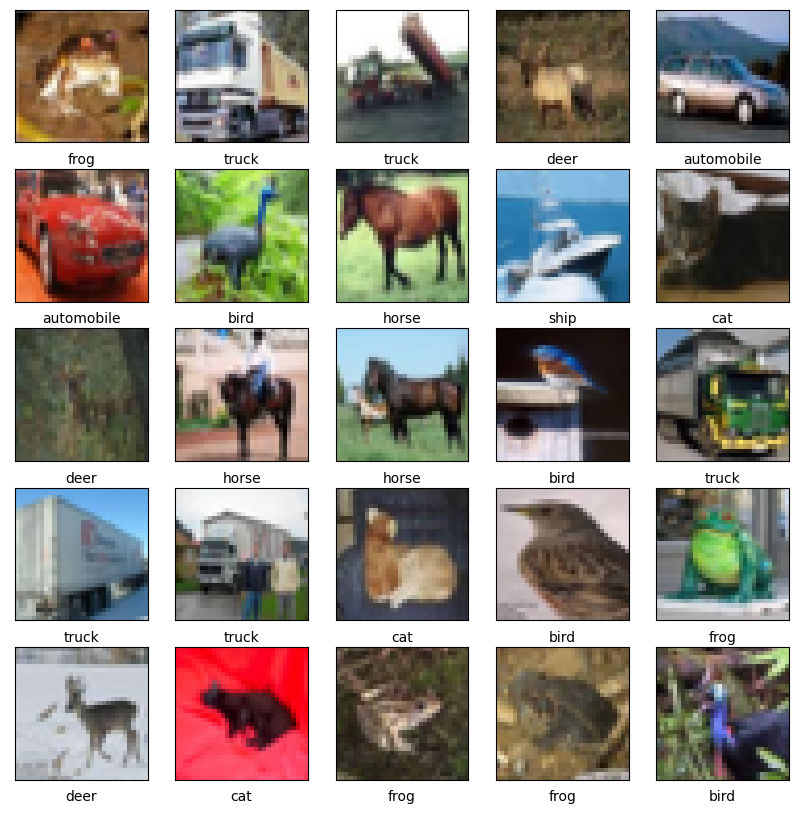

In [418]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [419]:
print('x_train, y_train shapes:', x_train.shape, y_train.shape)
print('x_test, y_test shapes:', x_test.shape, y_test.shape)

x_train, y_train shapes: (50000, 32, 32, 3) (50000,)
x_test, y_test shapes: (10000, 32, 32, 3) (10000,)


<a name='2.1'></a>
## Cuestión 1: Cree una red convolucional con la API funcional con al menos dos capas convolucionales y al menos dos capas de pooling. Utilize sólo [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) y no añada ninguna regularización.

In [193]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')

reescaling = layers.Rescaling(1. / 255)(inputs)

# Convolution + pooling layers
# copypaste del ejempo del notebook
conv_1 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.AveragePooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.AveragePooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)

# Fully-connected
outputs = layers.Dense(len(class_names), activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 pool_1 (AveragePooling2D)   (None, 15, 15, 4)         0         
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 4)         148       
                                                                 
 pool_2 (AveragePooling2D)   (None, 6, 6, 4)           0         
                                                                 
 flatten (Flatten)           (None, 144)               0   

In [194]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [195]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64,
                    validation_split=0.15)

Epoch 1/25
665/665 [==============================] - 10s 14ms/step - loss: 1.8959 - accuracy: 0.3078 - val_loss: 1.7898 - val_accuracy: 0.3519
Epoch 2/25
665/665 [==============================] - 8s 12ms/step - loss: 1.6755 - accuracy: 0.3968 - val_loss: 1.6207 - val_accuracy: 0.4160
Epoch 3/25
665/665 [==============================] - 7s 11ms/step - loss: 1.5397 - accuracy: 0.4444 - val_loss: 1.5417 - val_accuracy: 0.4512
Epoch 4/25
665/665 [==============================] - 7s 11ms/step - loss: 1.4735 - accuracy: 0.4690 - val_loss: 1.4731 - val_accuracy: 0.4660
Epoch 5/25
665/665 [==============================] - 7s 11ms/step - loss: 1.4371 - accuracy: 0.4850 - val_loss: 1.4715 - val_accuracy: 0.4651
Epoch 6/25
665/665 [==============================] - 7s 11ms/step - loss: 1.4121 - accuracy: 0.4944 - val_loss: 1.4766 - val_accuracy: 0.4793
Epoch 7/25
665/665 [==============================] - 7s 11ms/step - loss: 1.3918 - accuracy: 0.5042 - val_loss: 1.4206 - val_accuracy: 0.492

Test Loss: 1.324103832244873
Test Accuracy: 0.5260000228881836


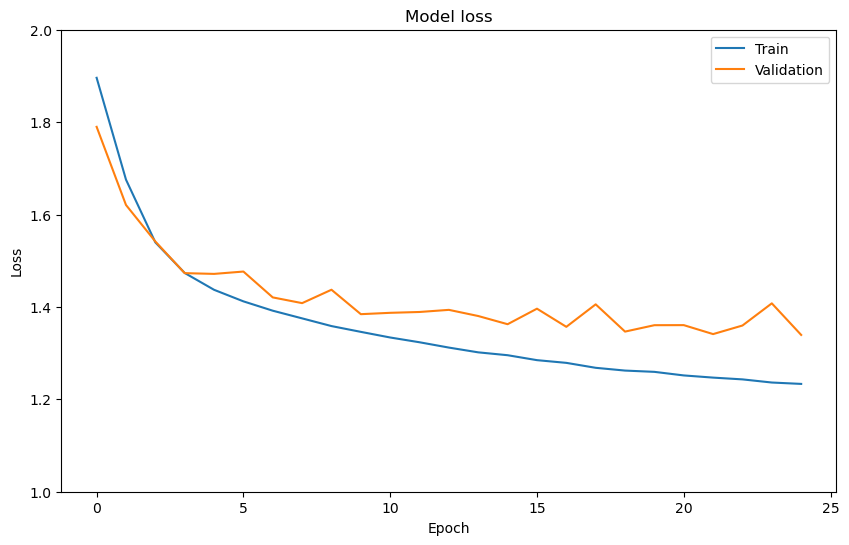

In [200]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_train_val(history, 1, 2)

<a name='2.2'></a>
## Cuestión 2: Cree un modelo con la API funcional con un máximo de 2 capas convolucionales y un máximo de 2 capas de pooling. Utilize  [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) o [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) y  añada la regularización que quiera. Debe obtener un `Test accuracy > 0.68`

In [241]:
from tensorflow.keras.layers import BatchNormalization

inputs = tf.keras.Input(shape=(32, 32, 3), name='input')

reescaling = layers.Rescaling(1. / 255)(inputs)

# Convolution + pooling layers
#  Mitad ejercicios de kaggle mitad chatgpt. He conseguido hacerlo igual de bien que alguien que utilizaba como 6 capas convolucionales, solo que creando dos capas densas de 256 en lugar de 512, not bad supongo.
# Al parecer, lo último en esto es usar "fractional pooling": https://arxiv.org/abs/1412.6071, https://www.tensorflow.org/api_docs/python/tf/nn/fractional_max_pool. No lo he utilizado pero lo pongo por curiosidad.

conv_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                       name='conv_1')(reescaling)
btch1 = BatchNormalization()(conv_1)  # como la red va a ser grande del copón, esto hará más eficiente el entrenamiento
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(btch1)
dropout1 = layers.Dropout(0.2)(pool_1)

conv_2 = layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv_2')(dropout1)
btch2 = BatchNormalization()(conv_2)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(btch2)
dropout2 = layers.Dropout(0.2)(pool_2)

flat = layers.Flatten(name='flatten')(dropout2)
dense1 = layers.Dense(256, activation='relu', name='dense1')(flat)
dropout3 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(256, activation='relu', name='dense2')(dropout3)


# Fully-connected
outputs = layers.Dense(len(class_names), activation='softmax', name='output')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_16 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 64)        0         
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 64)        0         
                                                          

In [242]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [243]:
# Tarda mucho, especialmente en local
history = model.fit(x_train, y_train, epochs=25, batch_size=64,
                    validation_split=0.15, callbacks=[es_callback]) # el callback no sirve de mucho pq lo puse a 10, pero lo dejo así. Prefiero que la red se quede hasta el final por si no alcanza el 0.68 antes

Epoch 1/25
665/665 [==============================] - 92s 136ms/step - loss: 1.8525 - accuracy: 0.3428 - val_loss: 1.5347 - val_accuracy: 0.4347
Epoch 2/25
665/665 [==============================] - 91s 137ms/step - loss: 1.5043 - accuracy: 0.4589 - val_loss: 1.3156 - val_accuracy: 0.5464
Epoch 3/25
665/665 [==============================] - 92s 138ms/step - loss: 1.3103 - accuracy: 0.5374 - val_loss: 1.4505 - val_accuracy: 0.5093
Epoch 4/25
665/665 [==============================] - 90s 135ms/step - loss: 1.1743 - accuracy: 0.5891 - val_loss: 1.2986 - val_accuracy: 0.5699
Epoch 5/25
665/665 [==============================] - 90s 136ms/step - loss: 1.0751 - accuracy: 0.6241 - val_loss: 1.1186 - val_accuracy: 0.6199
Epoch 6/25
665/665 [==============================] - 89s 134ms/step - loss: 0.9985 - accuracy: 0.6544 - val_loss: 1.1227 - val_accuracy: 0.6404
Epoch 7/25
665/665 [==============================] - 91s 137ms/step - loss: 0.9303 - accuracy: 0.6745 - val_loss: 0.9975 - val_ac

Test Loss: 0.7471197843551636
Test Accuracy: 0.7556999921798706


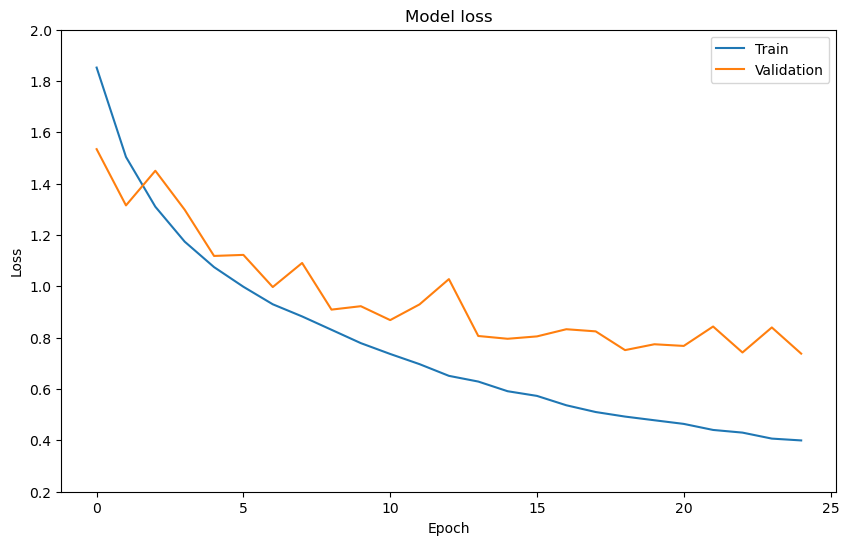

In [244]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_train_val(history, 0.2, 2)

<a name='2.3'></a>
## Cuestión 3: Añada data augmentation al principio del modelo. No es necesario mejorar el test_loss.



In [420]:
# copypaste del notebook
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),
    layers.RandomZoom(0.25),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(factor=0.2)
  ]
)

In [421]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')

data_aug = data_augmentation(inputs)

reescaling = layers.Rescaling(1. / 255)(data_aug)

# Convolution + pooling layers
# copypaste del ejempo del notebook
conv_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                       name='conv_1')(reescaling)
btch1 = BatchNormalization()(conv_1)  # como la red va a ser grande del copón, esto hará más eficiente el entrenamiento
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(btch1)
dropout1 = layers.Dropout(0.2)(pool_1)

conv_2 = layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv_2')(dropout1)
btch2 = BatchNormalization()(conv_2)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(btch2)
dropout2 = layers.Dropout(0.2)(pool_2)

flat = layers.Flatten(name='flatten')(dropout2)
dense1 = layers.Dense(256, activation='relu', name='dense1')(flat)
dropout3 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(256, activation='relu', name='dense2')(dropout3)


# Fully-connected
outputs = layers.Dense(len(class_names), activation='softmax', name='output')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 sequential_23 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 rescaling_20 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 64)        0         
                                                          

In [422]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [423]:
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=5)
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_split=0.15, callbacks=[es_callback])

Epoch 1/20
665/665 [==============================] - 121s 178ms/step - loss: 2.1839 - accuracy: 0.1959 - val_loss: 1.9780 - val_accuracy: 0.2467
Epoch 2/20
665/665 [==============================] - 115s 173ms/step - loss: 2.0779 - accuracy: 0.2209 - val_loss: 1.9829 - val_accuracy: 0.2624
Epoch 3/20
665/665 [==============================] - 117s 176ms/step - loss: 2.0179 - accuracy: 0.2422 - val_loss: 1.8629 - val_accuracy: 0.3003
Epoch 4/20
665/665 [==============================] - 119s 180ms/step - loss: 1.9635 - accuracy: 0.2659 - val_loss: 1.9114 - val_accuracy: 0.3012
Epoch 5/20
665/665 [==============================] - 115s 172ms/step - loss: 1.9057 - accuracy: 0.2865 - val_loss: 1.8363 - val_accuracy: 0.3309
Epoch 6/20
665/665 [==============================] - 114s 172ms/step - loss: 1.8548 - accuracy: 0.3050 - val_loss: 1.8467 - val_accuracy: 0.3221
Epoch 7/20
665/665 [==============================] - 114s 172ms/step - loss: 1.8081 - accuracy: 0.3285 - val_loss: 1.7605 -

Test Loss: 1.4441407918930054
Test Accuracy: 0.4864000082015991


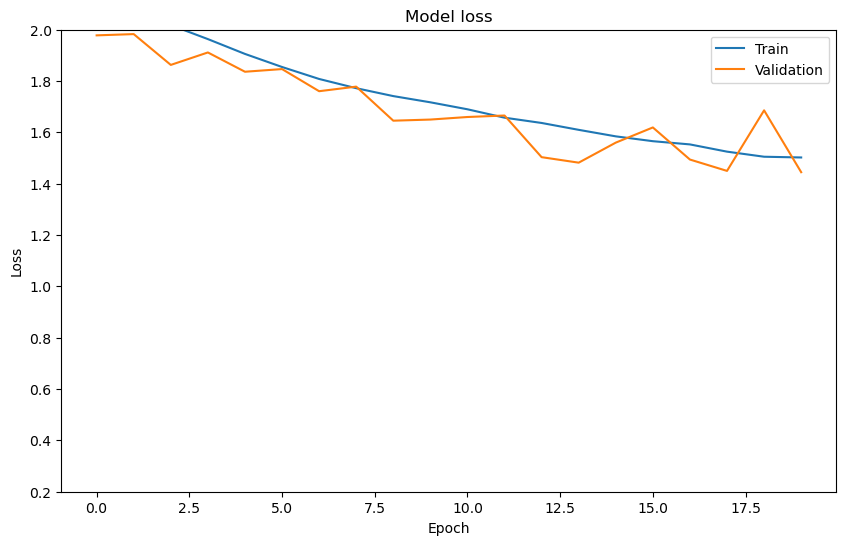

In [425]:
results = model.evaluate(x_test, y_test, verbose=0, batch_size=1000)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))
plot_train_val(history, 0.2, 2) 

#### Era predecible que el accuracy iba a ser peor... pero hay mucho margen de mejora, pese a que la CNN es relativamente grande para un problemilla como este

<a name='2.4'></a>
## Cuestión 4: Cree el mismo  modelo de manera secuencial. No es necesario compilar ni entrenar el modelo

In [250]:
model_seq = keras.Sequential([
  layers.InputLayer(input_shape=(32, 32, 3)),
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation='softmax')
])

model_seq.summary() # confirmamos que es igual

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 rescaling_18 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_26 (Dropout)        (None, 16, 16, 64)      

<a name='2.5'></a>
## Cuestión 5: Si tenenemos una  una imagen de entrada de 300 x 300 a color (RGB) y queremos usar una red densa. Si la primera capa oculta tiene 100 neuronas, ¿Cuántos parámetros tendrá esa capa (sin incluir el bias) ?


 Sin incluir el sesgo, una imagen 2D de 300x300 a color tendrá una dimensión de de 3x300x300=270.000, que multiplicado por 100 neuronas, nos da como resultado 100x300x300x3=27.000.000 parámetros

<a name='2.6'></a>
## Cuestión 6   Ponga  las verdaderas ventajas de las redes convolucionales respecto a las densas

**a)** **Reducen el número total de parámetros, reduciendo así el overfitting.**
- Tanto la convolución como el pooling son mecanismos que reducen el número total de parámetros, lo que puede potencialmente reducir el overfitting. Además, la convolución puede detectar patrones que se agrupan en ciertas partes de la imagen (bordes, formas, etc.), lo que hará que el ajuste sea mejor y aumente la precisión que si se hiciera una red densa con una función píxel a píxel.

**b)** **Permiten utilizar una misma 'función'  en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.**
- Se ha contestado arriba

**c)** Permiten el uso del transfer learning.
- Las redes densas también permiten el transfer learning, pero es posible que sus resultados no sean tan prometedores.

**d)** Generalmente son menos profundas, lo que facilita su entrenamiento.
- Las redes convolucionales son normalmente más profundas que las densas.


<a name='2.7'></a>
## Cuestión 7: Para el procesamiento de series temporales las redes convolucionales no son efectivas, habrá que usar redes recurrentes.

- **Verdadero** 
- Falso 

<a name='actividad_3'></a>
# Actividad 3: Redes Recurrentes


- [Cuestión 1](#3.1): 0.5 pt
- [Cuestión 2](#3.2): 0.5 pt
- [Cuestión 3](#3.3): 0.5 pts
- [Cuestión 4](#3.4): 0.25 pts
- [Cuestión 5](#3.5): 0.25 pts

Vamos a usar un dataset de las temperaturas mínimas diarias en Melbourne. La tarea será la de predecir la temperatura mínima en dos días. Puedes usar técnicas de series temporales vistas en otras asignaturas, pero no es necesario.


In [392]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data_dir = tf.keras.utils.get_file('daily-min-temperatures.csv', origin=dataset_url)

In [393]:
df = pd.read_csv(data_dir, parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [394]:
temperatures = df['Temp'].values
print('number of samples:', len(temperatures))
train_data = temperatures[:3000]
test_data = temperatures[3000:]
print('number of train samples:', len(train_data))
print('number of test samples:', len(test_data))
print('firsts trainn samples:', train_data[:10])

number of samples: 3650
number of train samples: 3000
number of test samples: 650
firsts trainn samples: [20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20. ]


<a name='3.1'></a>
## Cuestión 1: Convierta `train_data` y `test_data`  en ventanas de tamaño 5, para predecir el valor en 2 días

En la nomenclatura de [Introduction_to_RNN_Time_Series.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/RNN/Introduction_to_RNN_Time_Series.ipynb)
```python
win_size, horizon = (5, 2)
```

Para las primeras 10 muestras de train_data `[20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20. ]` el resultado debería ser:

```python
x[0] : [20.7, 17.9, 18.8, 14.6, 15.8] , y[0]: 15.8
x[1] : [17.9, 18.8, 14.6, 15.8, 15.8] , y[1]: 17.4
x[2] : [18.8, 14.6, 15.8, 15.8, 15.8] , y[2]: 21.8
x[3] : [14.6, 15.8, 15.8, 15.8, 17.4] , y[3]: 20.             
```

In [395]:
def create_windows_np(data, window_size, horizon, shuffle=False):
    """
    Creates a dataset from the given time series data using NumPy.
    
    Parameters:
    data (np.ndarray): Time series data with one dimension.
    window_size (int): The number of past time steps to use as input features.
    horizon (int): The number of future time steps to predict.
    shuffle (bool): Shuffle the windows or not.
    
    Returns:
    tuple: A tuple containing the input-output pairs (windows, targets) as NumPy arrays.
    """

    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size+horizon-1])

    X, y = np.array(X), np.array(y)
    
    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]
    
    return X, y

In [396]:
win_size, horizon = (5, 2)

X_train, y_train = create_windows_np(train_data, win_size, horizon, shuffle=False)
X_test, y_test = create_windows_np(test_data, win_size, horizon, shuffle=False)

print(f'X Train sample: {X_train[:4]}')
print(f'Y Train sample: {y_train[:4]}')
# confirmamos que el resultado es el mismo, sin barajar

X Train sample: [[20.7 17.9 18.8 14.6 15.8]
 [17.9 18.8 14.6 15.8 15.8]
 [18.8 14.6 15.8 15.8 15.8]
 [14.6 15.8 15.8 15.8 17.4]]
Y Train sample: [15.8 17.4 21.8 20. ]


<a name='3.2'></a>
## Cuestión 2: Cree un modelo recurrente de dos capas GRU para predecir con las ventanas de la cuestión anterior.


In [283]:
# es un modelo univariante
inputs = keras.layers.Input(shape=(win_size, 1))

gru1 = keras.layers.GRU(256, activation='relu', return_sequences=True, input_shape=(win_size, 1))(inputs)
gru2 = keras.layers.GRU(256, activation='relu', return_sequences=False, input_shape=(win_size, 1))(gru1)

outputs = keras.layers.Dense(1, activation='relu')(gru2)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 gru_8 (GRU)                 (None, 5, 256)            198912    
                                                                 
 gru_9 (GRU)                 (None, 256)               394752    
                                                                 
 dense_79 (Dense)            (None, 1)                 257       
                                                                 
Total params: 593,921
Trainable params: 593,921
Non-trainable params: 0
_________________________________________________________________


In [284]:
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=50)

history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.2, shuffle=True, batch_size = 64, callbacks=[es_callback]
)

Epoch 1/200
38/38 [==============================] - 6s 54ms/step - loss: 25.6932 - val_loss: 9.2050
Epoch 2/200
38/38 [==============================] - 2s 54ms/step - loss: 9.4471 - val_loss: 8.7257
Epoch 3/200
38/38 [==============================] - 2s 56ms/step - loss: 9.2211 - val_loss: 8.5966
Epoch 4/200
38/38 [==============================] - 2s 52ms/step - loss: 8.9549 - val_loss: 8.9638
Epoch 5/200
38/38 [==============================] - 2s 44ms/step - loss: 8.9510 - val_loss: 8.8515
Epoch 6/200
38/38 [==============================] - 2s 44ms/step - loss: 8.8768 - val_loss: 8.4042
Epoch 7/200
38/38 [==============================] - 2s 44ms/step - loss: 8.8448 - val_loss: 8.3891
Epoch 8/200
38/38 [==============================] - 2s 44ms/step - loss: 8.8062 - val_loss: 8.4929
Epoch 9/200
38/38 [==============================] - 2s 44ms/step - loss: 8.8911 - val_loss: 8.3748
Epoch 10/200
38/38 [==============================] - 2s 44ms/step - loss: 8.7192 - val_loss: 8.374

21/21 [==============================] - 0s 12ms/step - loss: 7.3982
Test Loss: 7.3981852531433105


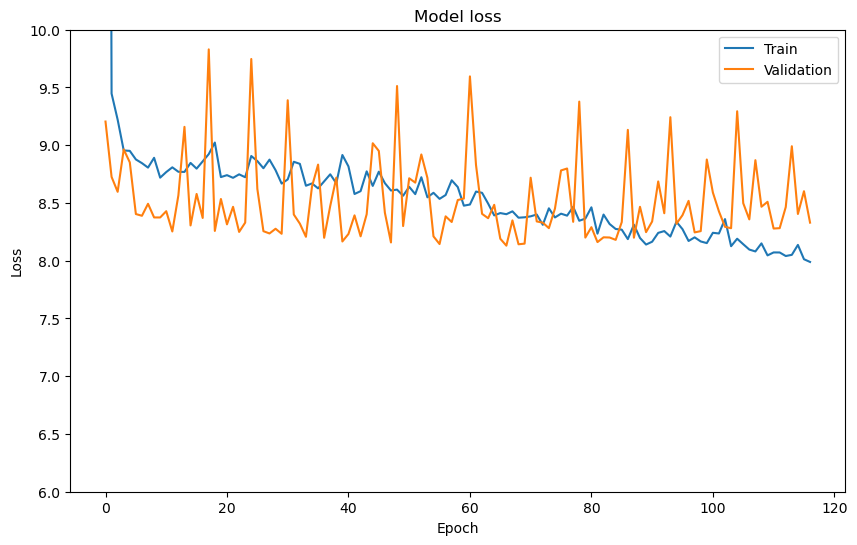

In [287]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))
plot_train_val(history, 6, 10)

<a name='3.3'></a>
## Cuestión 3: Añada más features a la series temporal, por ejemplo `portion_year`. Cree un modelo que mejore al anterior.


In [405]:
## Puede añadir más features
df['portion_year'] = df['Date'].dt.dayofyear / 365.0
df['portion_month'] = df['Date'].dt.month / 12.0
df_multi = df[['Temp', 'portion_year', 'portion_month']].copy()

## train - test split
train_data = df_multi.iloc[:3000].copy()
test_data = df_multi.loc[3000:, :].copy()

In [406]:
train_data.columns

Index(['Temp', 'portion_year', 'portion_month'], dtype='object')

In [407]:
def create_windows_multivariate_np(data, window_size, horizon, target_col_idx, shuffle=False):
    """
    Creates a dataset from the given time series data using NumPy.

    Parameters:
    data (np.ndarray or pd.DataFrame): Time series data with multiple features.
    window_size (int): The number of past time steps to use as input features.
    horizon (int): The number of future time steps to predict.
    target_col_idx (int): The index of the target column in the input data.
    shuffle (bool): Whether to shuffle the data or not.

    Returns:
    tuple: A tuple containing the input-output pairs (X, y) as NumPy arrays.
    """
    if isinstance(data, pd.DataFrame):
        data = data.values

    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size, :])
        y.append(data[i+window_size+horizon-1, target_col_idx])

    X, y = np.array(X), np.array(y)

    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]

    return X, y

In [408]:
X_train, y_train = create_windows_multivariate_np(train_data, win_size, horizon, 0, shuffle=False)
X_test, y_test = create_windows_multivariate_np(test_data, win_size, horizon, 0, shuffle=False)

In [409]:
# únicamente hemos añadido una variable nueva
n_features = 3

inputs = keras.layers.Input(shape=(5, n_features))

lstm_1 = keras.layers.LSTM(128, activation='relu', return_sequences=True)(inputs)
lstm_2 = keras.layers.LSTM(128, activation='relu', return_sequences=True)(lstm_1)
lstm_3 = keras.layers.LSTM(128, activation='relu')(lstm_2)
dropout = keras.layers.Dropout(0.3)(lstm_3)


outputs = keras.layers.Dense(1, activation='relu')(dropout)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 5, 3)]            0         
                                                                 
 lstm_24 (LSTM)              (None, 5, 128)            67584     
                                                                 
 lstm_25 (LSTM)              (None, 5, 128)            131584    
                                                                 
 lstm_26 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_100 (Dense)           (None, 1)                 129       
                                                                 
Total params: 330,881
Trainable params: 330,881
Non-traina

In [410]:
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=20)

history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.2, shuffle=True, batch_size = 64, callbacks=[es_callback]
)

Epoch 1/200
38/38 [==============================] - 9s 118ms/step - loss: 49.0073 - val_loss: 11.6113
Epoch 2/200
38/38 [==============================] - 4s 100ms/step - loss: 12.9365 - val_loss: 10.9173
Epoch 3/200
38/38 [==============================] - 4s 102ms/step - loss: 11.1539 - val_loss: 9.3375
Epoch 4/200
38/38 [==============================] - 4s 102ms/step - loss: 10.8795 - val_loss: 11.4669
Epoch 5/200
38/38 [==============================] - 4s 106ms/step - loss: 10.9281 - val_loss: 9.2351
Epoch 6/200
38/38 [==============================] - 4s 105ms/step - loss: 10.3976 - val_loss: 9.1143
Epoch 7/200
38/38 [==============================] - 4s 103ms/step - loss: 10.4138 - val_loss: 8.4026
Epoch 8/200
38/38 [==============================] - 4s 102ms/step - loss: 10.5719 - val_loss: 8.5216
Epoch 9/200
38/38 [==============================] - 4s 103ms/step - loss: 10.3333 - val_loss: 8.4170
Epoch 10/200
38/38 [==============================] - 4s 108ms/step - loss: 9.9

21/21 [==============================] - 0s 15ms/step - loss: 6.5804
Test Loss: 6.580389022827148


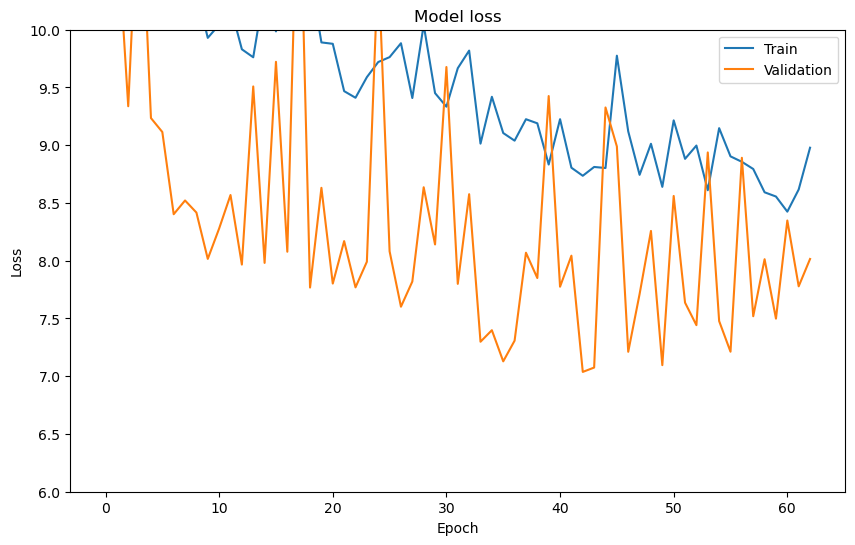

In [411]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results))
plot_train_val(history, 6, 10)

# Parece que las LSTM y el dropout son mejores que las GRU, pero la evolución de la validación y el train es bastante plana

21/21 [==============================] - 1s 14ms/step


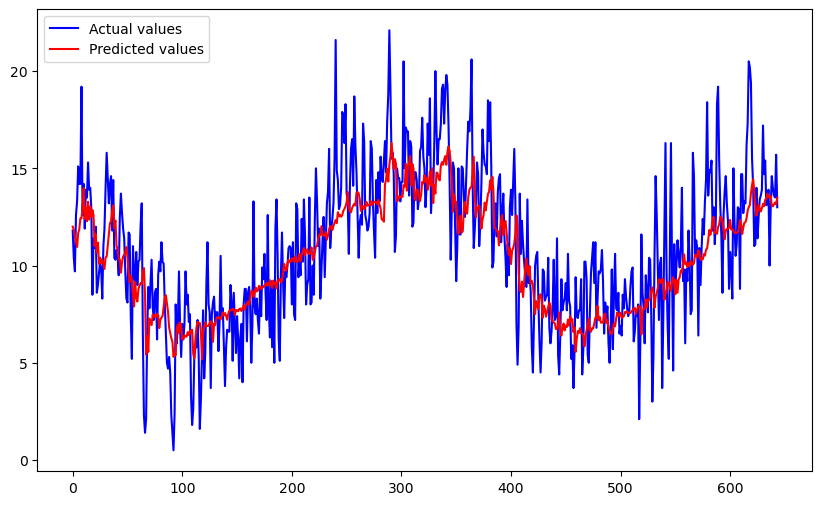

In [412]:
plt.figure(figsize=(10,6))

time = range(len(y_test))

y_pred = model.predict(X_test)

plt.plot(time, y_test, 'b-', label='Actual values')

plt.plot(time, y_pred, 'r-', label='Predicted values')

plt.legend()

plt.show()

#### El problema fundamental de nuestra predicción parece que se ajusta demasiado a la media y no captura bien la variación diaria, lo más difícil en las series temporales

<a name='3.4'></a>
## Cuestión 4: ¿En cuáles de estas aplicaciones se usaría un arquitectura 'many-to-one'?

**a)** **Clasificación de sentimiento en textos**
- Un clasificador de sentimiento es un clásico problema many-to-one, ya que se presentan varios textos que se han de limpiar y convertir en una matriz tf-idf para después clasificarlos en positivo/negativo. Si fuera un clasificador de *sentimientos* (alegría, tristeza, aburrimiento, etc.) entonces sería más propia una arquitectura many-to-many.

**b)** **Verificación de voz para iniciar el ordenador.**
- En la verificación, la RNN también recibe varios inputs (sonidos) para devolver un único output (verificado/no verificado)

**c)** Generación de música.
- La arquitectura GPT es one-to-many, ya que recibe un sólo input (texto, voz, o música, incluso) y devuelve un output (música, en este caso).

**d)** Un clasificador que clasifique piezas de música según su autor.
- De la misma manera que con los *sentimientos*, un problema multi-class o multi-label requiere una arquitectura many-to-many.



<a name='3.5'></a>
## Cuestión 5: ¿Qué ventajas aporta el uso de word embeddings?

**a)** **Permiten reducir la dimensión de entrada respecto al one-hot encoding.**
- Al poder representar los textos en un espacio vectorial, se reduce sustancialmente el tamaño que tendrían por one-hot encoding, que requiere una columna para cada categoría de una variable.

**b)** **Permiten descubrir la similaridad entre palabras de manera más intuitiva que con one-hot encoding.**
- También gracias a su representación vectorial, es posible calcular la distancia del coseno entre dos vectores de palabras y obtener un indicador bastante consistente de su similitud en el vocabulario analizado (aunque dependerá del problema).

**c)** **Son una manera de realizar transfer learning en nlp.**
- Existen numerosos modelos pre-entrenados que utilizan word embedddings, siendo los sentence-transformers uno de los más conocidos, que permiten analizar la similitud semántica entre palabras de una manera bastante eficiente, pudiendo aplicarlos a nuevos datos via transfer learning.

**d)** **Permiten visualizar las relaciones entre palabras con métodos de reducción de dimensiones como el PCA.**
- Combinar los word embeddings y el PCA nos permite reducir el espacio vectorial a C-dimensiones (donde C es el nº de componentes) y así poder visualizar de una manera rápida la similitud entre distintos grupos de palabras, lo que puede ser útil para muchas tareas tanto de descripción, predicción o inferencia.
